Chapter 5 Exercises

Import the libraries and data files

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fbstockdf = pd.read_csv("data/fb_stock_prices_2018.csv", index_col='date', parse_dates=True)

Exercise 1

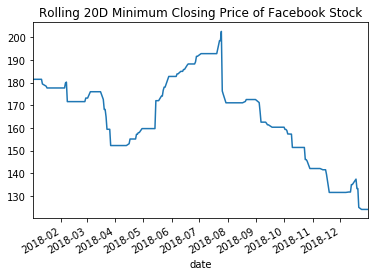

In [29]:
fbstockdf.close.rolling('20D').min().plot(title='Rolling 20D Minimum Closing Price of Facebook Stock')

In [ ]:
Exercise 2:

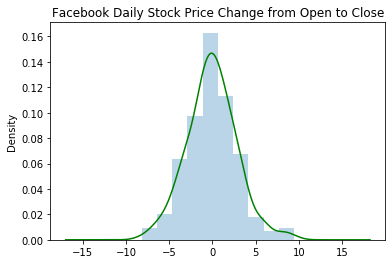

In [28]:
diff = fbstockdf.open - fbstockdf.close

ax = diff.plot(kind='hist', density=True, alpha=0.3)
diff.plot(kind='kde', color='green', ax=ax, title='Facebook Daily Stock Price Change from Open to Close')

Exercise 3

In [10]:
earthquakesdf = pd.read_csv('data/earthquakes.csv')

mb            AxesSubplot(0.1,0.15;0.173913x0.75)
ms_20    AxesSubplot(0.308696,0.15;0.173913x0.75)
mwr      AxesSubplot(0.517391,0.15;0.173913x0.75)
mww      AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

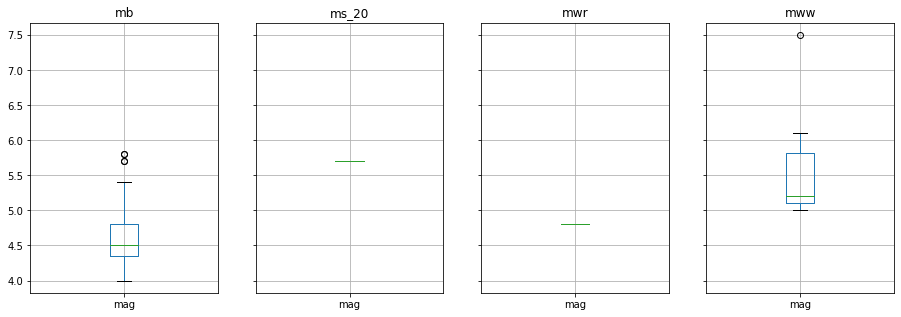

In [27]:
earthquakesdf.query('parsed_place == "Indonesia"')[['mag', 'magType']].groupby('magType').boxplot(layout=(1, 4), figsize=(15, 5))

Exercise 4

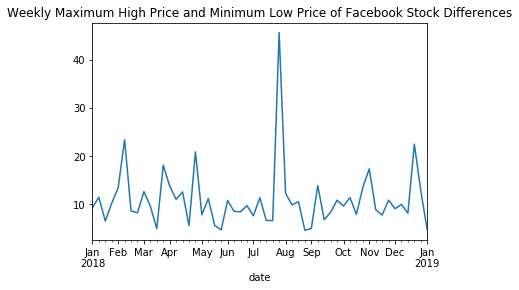

In [26]:
fbstockdf.resample('1W').agg(dict(high='max', low='min')).assign(maxchgwkly=lambda x: x.high - x.low
).maxchgwkly.plot(title='Weekly Maximum High Price and Minimum Low Price of Facebook Stock Differences'
)

In [ ]:
Exercise 5

In [30]:
covid19df = pd.read_csv('data/covid19_cases.csv').assign(date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace('United_States_of_America', 'USA').sort_index()['2020-01-18':'2020-09-18']

KeyError: 'state'

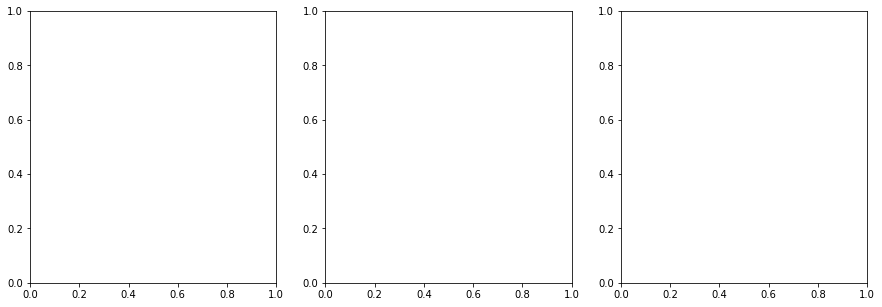

In [31]:
 fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average = covid19df.pivot_table(
    index=covid19df.index, columns=['state'], values='cases'
).apply(lambda x: x.diff().rolling(14).mean())
new_cases_rolling_average[['Brazil', 'India', 'USA']].plot(ax=axes[0])

new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], color=['red', 'green'],
    title='COVID-19 - 14-day rolling average of change in daily new cases'
)
new_cases_rolling_average[['Chine']].plot(ax=axes[2], color='blue')

Exercise 6

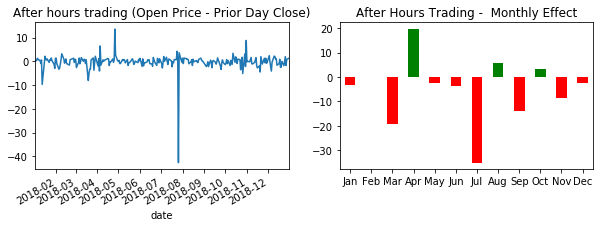

In [25]:
afterhrsdf = (fbstockdf.open - fbstockdf.close.shift())
moneffdf = afterhrsdf.resample('1M').sum()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

afterhrsdf.plot(ax=axes[0], title='After hours trading (Open Price - Prior Day Close)')

moneffdf.index = moneffdf.index.strftime('%b')

moneffdf.plot(ax=axes[1], kind='bar', title='After Hours Trading -  Monthly Effect', color=np.where(moneffdf >= 0, 'g', 'r'), rot=0)